# **DATASET KURS USD/IDR - GOOGLE COLAB CODE**

# Preparation

In [ ]:
# Importing Libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Wrangling

## 1. Data Extraction


In [ ]:
ticker = yf.Ticker('IDR=X')
usdidr = ticker.history(start="2005-11-01", end="2023-12-31", auto_adjust=False)

## 2. Saving to CSV for reference


In [ ]:
usdidr.reset_index(inplace=True)
usdidr['Date'] = usdidr['Date'].dt.date
usdidr.to_csv('data_usdidr.csv', index=False)

## 3. Loading the Data


In [ ]:
data_usdidr = pd.read_csv('data_usdidr.csv')
data_usdidr.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2009-01-01,11160.0,11180.0,11102.0,11142.0,11142.0,0,0.0,0.0
1,2009-01-02,11140.0,11271.0,10700.0,10991.0,10991.0,0,0.0,0.0
2,2009-01-05,10963.0,11282.0,10850.0,10929.0,10929.0,0,0.0,0.0
3,2009-01-06,10946.0,11204.0,10946.0,10992.0,10992.0,0,0.0,0.0
4,2009-01-07,11000.0,11051.0,10650.0,10852.0,10852.0,0,0.0,0.0


# Data Preprocessing


## 1. Selecting Relevant Columns


In [ ]:
data_usdidr_filter = data_usdidr[['Date', 'Close']]
data_usdidr_filter['Date'] = pd.to_datetime(data_usdidr_filter['Date'])

<ipython-input-38-4e76d5fa03d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usdidr_filter['Date'] = pd.to_datetime(data_usdidr_filter['Date'])


## 2. Handling Missing Values


In [ ]:
print("Checking for missing values:")
print(data_usdidr_filter.isna().sum())

Checking for missing values:
Date     0
Close    0
dtype: int64


## 3. Removing Outliers


In [ ]:
data_clean_df = data_usdidr_filter.copy()
data_clean_df.loc[data_clean_df['Close'] < 1000, 'Close'] = np.nan
data_clean_df['Close'] = data_clean_df['Close'].interpolate(method='linear', limit_direction='forward')


In [ ]:
data_clean_df.head()

,Date,Close
0,2009-01-01,11142.0
1,2009-01-02,10991.0
2,2009-01-05,10929.0
3,2009-01-06,10992.0
4,2009-01-07,10852.0


# Data Assessing


## 1. Checking Data Information and Duplicates


In [ ]:
print("Data Info:")
data_clean_df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906 entries, 0 to 3905
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3906 non-null   datetime64[ns]
 1   Close   3906 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 61.2 KB


In [ ]:
print("Duplicate Rows:", data_clean_df.duplicated().sum())


Duplicate Rows: 0


## 2. Descriptive Statistics


In [ ]:
print("Descriptive Statistics:")
data_clean_df.describe()

Descriptive Statistics:


,Date,Close
count,3906,3906.000000
mean,2016-07-01 16:21:45.069124608,12467.380046
min,2009-01-01 00:00:00,8292.700195
25%,2012-10-01 06:00:00,9744.000000
50%,2016-06-30 12:00:00,13318.000000
75%,2020-04-01 18:00:00,14300.875000
max,2023-12-29 00:00:00,16504.800781
std,NaN,2263.975643


# Data Visualization


## 1. Line Plot of Close Price Over Time


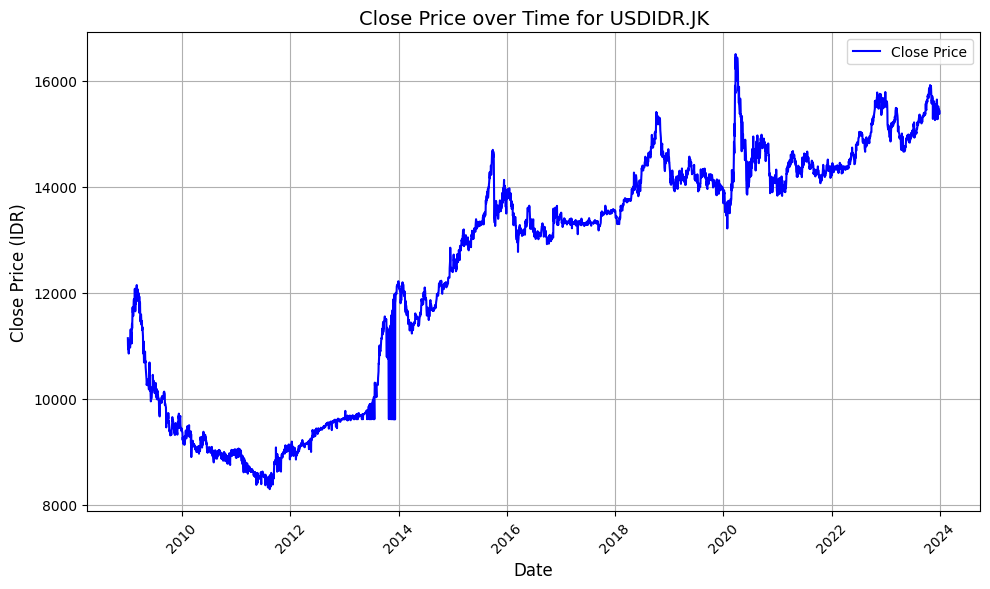

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_clean_df['Date'], data_clean_df['Close'], label='Close Price', color='blue')
plt.title('Close Price over Time for USDIDR.JK', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (IDR)', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Monthly Average Close Price


### Resampling data to monthly averages

In [ ]:
data_usdidr_bulan = data_clean_df.copy()
data_usdidr_bulan.set_index('Date', inplace=True)
data_per_bulan = data_usdidr_bulan['Close'].resample('M').mean()
data_per_bulan.index = data_per_bulan.index.strftime('%b %Y')


<ipython-input-46-035ca704446d>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_per_bulan = data_usdidr_bulan['Close'].resample('M').mean()


### Plotting the monthly average close price


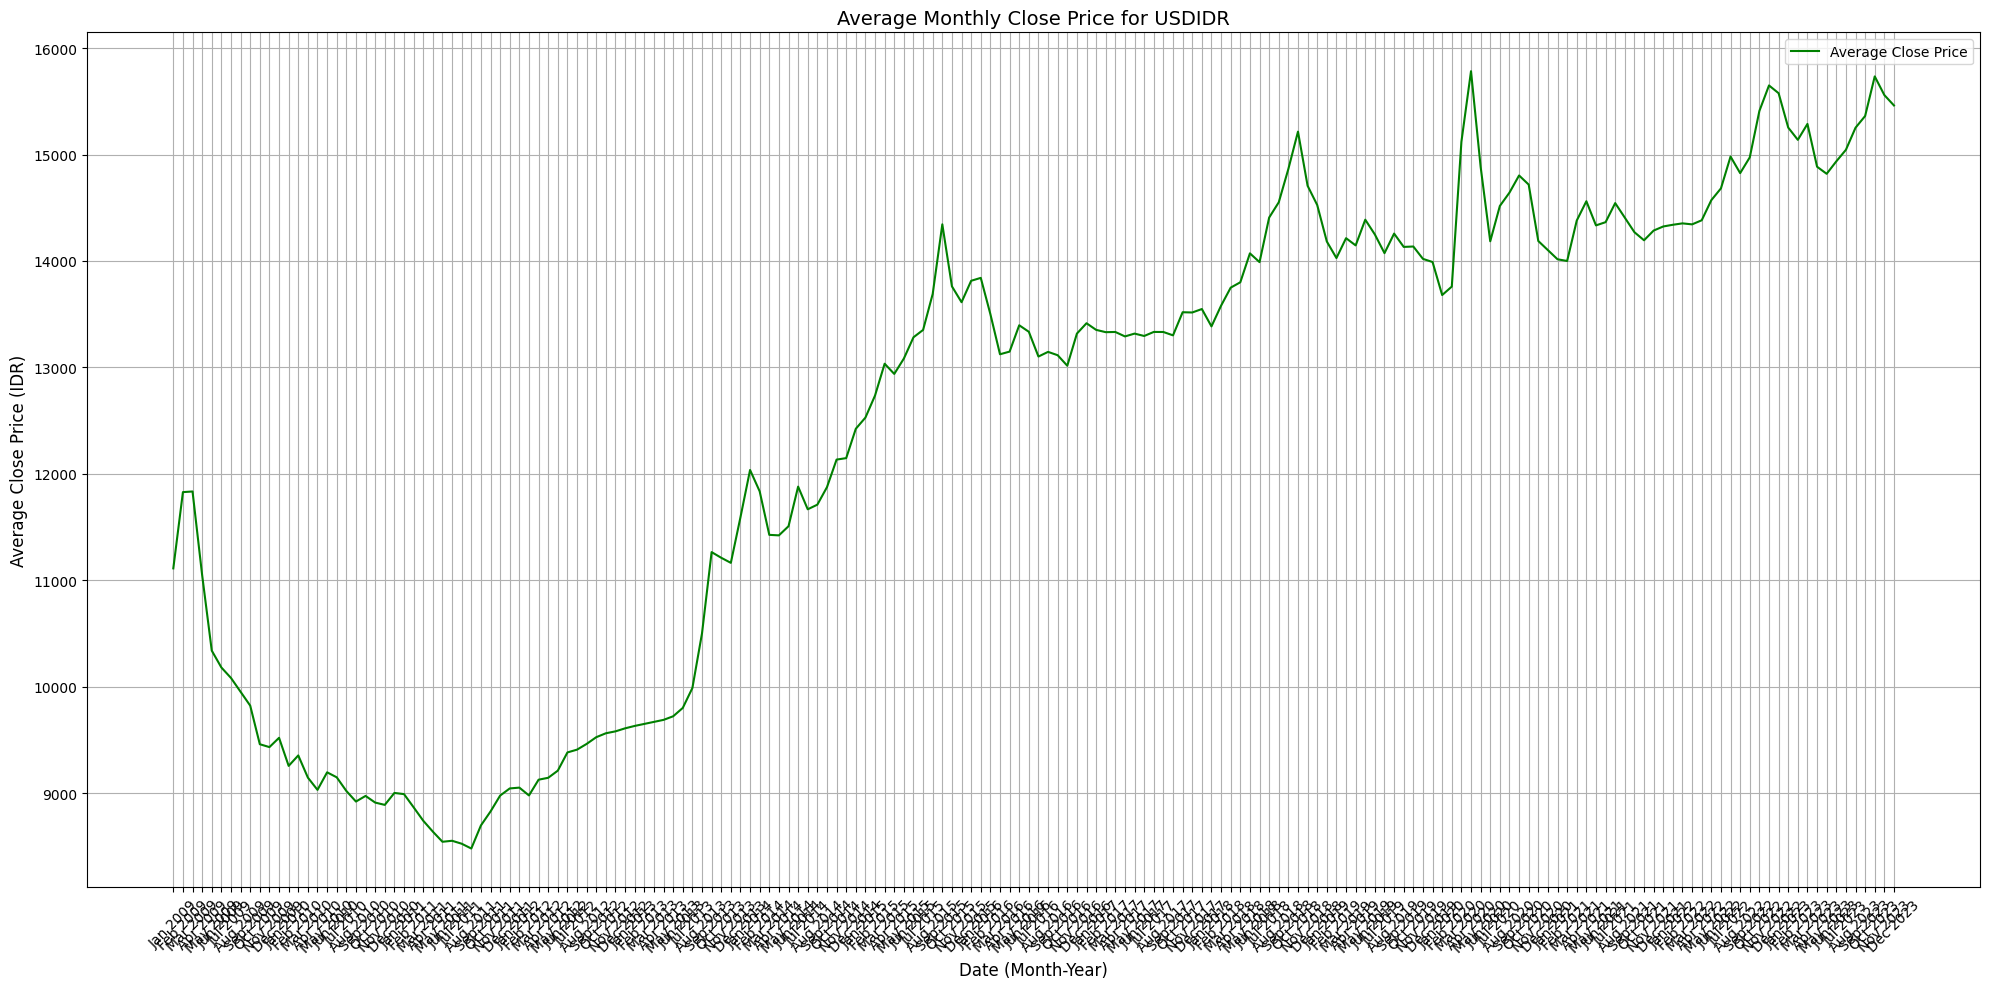

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(data_per_bulan.index, data_per_bulan.values, label='Average Close Price', color='green')
plt.title('Average Monthly Close Price for USDIDR', fontsize=14)
plt.xlabel('Date (Month-Year)', fontsize=12)
plt.ylabel('Average Close Price (IDR)', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Saving Monthly Data to CSV

In [ ]:
data_per_bulan.to_csv('data_usdidr_per_bulan.csv', header=True)

In [ ]:
from google.colab import files
files.download('data_usdidr_per_bulan.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>